# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Output:
    state_neuron (1D list): State of neuron 1 or 0 for the particular inputs.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length"

    state_neuron = []

    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length"

    state_neuron = []

    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Question - 1: List out all the limitations of MCP - Neurons.

The McCulloch-Pitts (MCP) Neuron has several limitations. It lacks learning ability since its weights and thresholds are fixed. The binary output (0 or 1) restricts its capability to handle complex problems. It cannot solve non-linearly separable problems like XOR. The model does not support weighted inputs, treating all inputs equally. It also cannot process temporal data, making it unsuitable for sequential tasks. Due to its simplicity, it struggles with real-world complexity and is highly sensitive to noise. Additionally, a single-layer MCP network can only solve linearly separable functions, limiting its expressiveness.

Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

The MCP neuron alone cannot solve the XOR function because it is not linearly separable. However, using two MCP neurons, we can break XOR into (A AND (NOT B)) OR ((NOT A) AND B). This can be written as an if-else rule:


if (A == 1 and B == 0) or (A == 0 and B == 1):  
    return 1  
else:  
    return 0  
    
This logic mimics XOR by using two layers one for AND/NOT operations and another for OR operation.

# Implementation for 0 Vs. 1 Classification.

# **Dataset 1**

## Step 1: Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

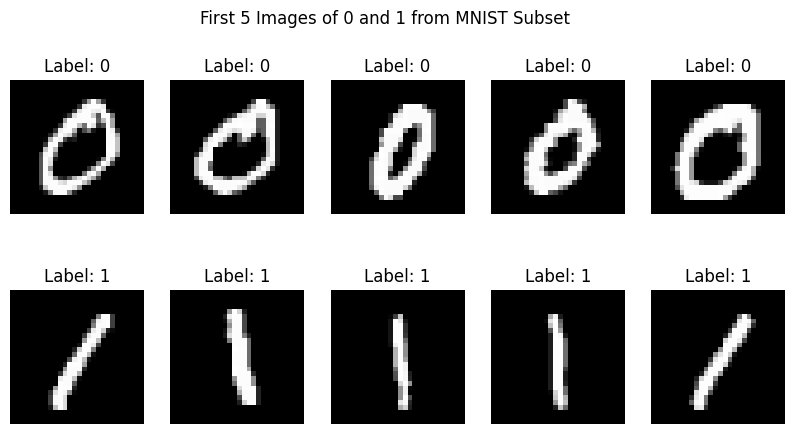

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Compute linear combination of inputs and weights, then add bias
    predictions = np.dot(X, weights) + bias

    # Apply step function as activation function
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions in the last epoch.
    """

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(X.shape[0]):
            # Calculate the prediction (Step Function)
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0

            # Check if prediction is correct
            if y_pred == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias if prediction is wrong
                error = y[i] - y_pred
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        # Calculate accuracy at the end of each epoch
        accuracy = correct_predictions / X.shape[0]

    return weights, bias, accuracy


## Training the Perceptron




In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


# **Dataset 2**

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_2 = pd.read_csv("/content/drive/MyDrive/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_2.drop(columns=["label"]).values  # 784 pixels
y = df_0_2["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


### Viewing the Dataset.

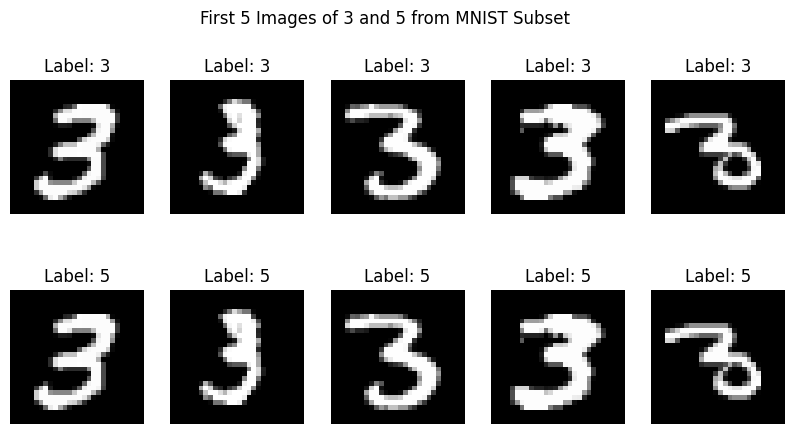

In [ ]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Compute linear combination of inputs and weights, then add bias
    predictions = np.dot(X, weights) + bias

    # Apply step function as activation function
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions in the last epoch.
    """

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(X.shape[0]):
            # Calculate the prediction (Step Function)
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0

            # Check if prediction is correct
            if y_pred == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias if prediction is wrong
                error = y[i] - y_pred
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        # Calculate accuracy at the end of each epoch
        accuracy = correct_predictions / X.shape[0]

    return weights, bias, accuracy


## Training the Perceptron




In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  0.0


## Step 5: Visualize Misclassified Images

Final Accuracy: 0.0000


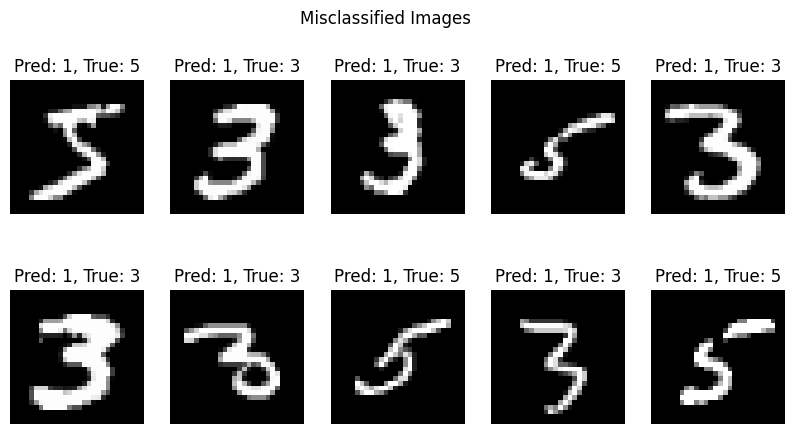

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")